In [8]:
import pandas as pd
import numpy as np

In [10]:
df_delivery=pd.read_csv("delivery_time.csv")
df_delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [12]:
df_salary=pd.read_csv("salary_data.csv")
df_salary

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [18]:
df_delivery.shape

(21, 2)

In [20]:
df_salary.shape

(30, 2)

In [22]:
df_delivery.info

<bound method DataFrame.info of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [24]:
df_salary.info

<bound method DataFrame.info of     YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872>

In [26]:
df_delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [28]:
df_salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [30]:
df_delivery.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [32]:
df_salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Matplot

In [35]:
pip install matplotlib

In [36]:
import matplotlib.pyplot as plt

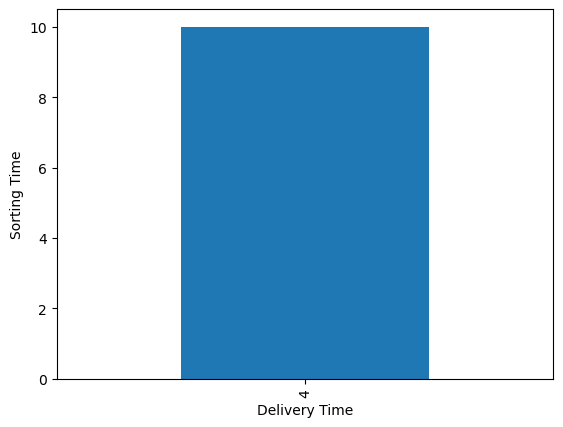

In [37]:
df_d=df_delivery.groupby("Delivery Time")["Sorting Time"]
df_d.plot(kind="bar",title="",xlabel="Delivery Time",ylabel="Sorting Time")
plt.show()

### Sea Born

In [14]:
import os
os.makedirs('graphs/delivery_time', exist_ok=True)
os.makedirs('graphs/salary_hike', exist_ok=True)

In [16]:
import seaborn as sns

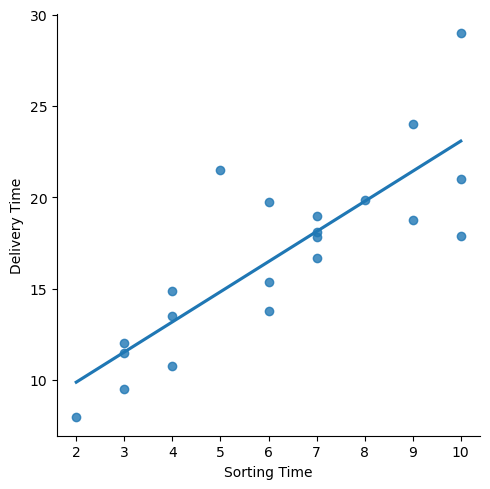

In [18]:
scatter_plot = sns.lmplot(data=df_delivery, x="Sorting Time", y="Delivery Time", ci=None)
scatter_plot.fig.savefig('graphs/delivery_time/scatter_plot.png')

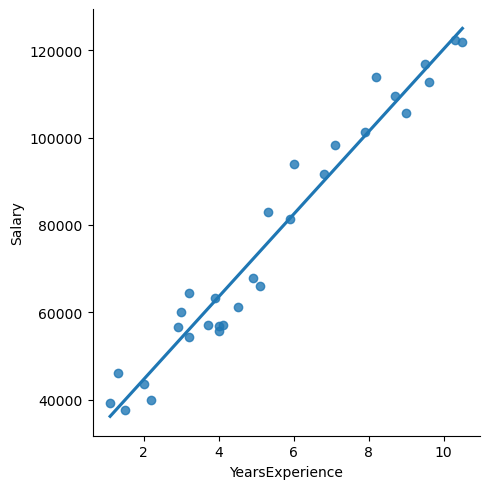

In [45]:
df_s=sns.lmplot(data=df_salary, x="YearsExperience", y="Salary", ci=None)
df_s.fig.savefig('graphs/salary_hike/scatter_plot.png')

#### Correlation CoEfficient

In [48]:
corr_delivery=df_delivery.corr()
print("Correlation Matrix:\n",corr_delivery)

Correlation Matrix:
                Delivery Time  Sorting Time
Delivery Time       1.000000      0.825997
Sorting Time        0.825997      1.000000


In [51]:
corr_salary = df_salary.corr()
print("\nCorrelation Matrix:\n", corr_salary)


Correlation Matrix:
                  YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


# Model Building

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

### Delivery Data

In [68]:
x=df_delivery[["Sorting Time"]]
y=df_delivery["Delivery Time"]

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [74]:
model_delivery=LinearRegression()
model_delivery.fit(x_train,y_train)

LinearRegression()

In [78]:
y_pred=model_delivery.predict(x_test)

#### Model Evaluation

In [84]:
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)

print(f"Model Evaluation Metrics:")
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R^2: {r2:.2f}")

Model Evaluation Metrics:
MAE: 2.60, MSE: 11.23, RMSE: 3.35, R^2: -0.15


In [86]:
coefficients_delivery = pd.DataFrame({"Feature": ["Intercept", "Sorting Time"],
    "Coefficient": [model_delivery.intercept_, model_delivery.coef_[0]]})
coefficients_delivery.to_excel("Delivery_Coefficients.xlsx", index=False)
print("Model coefficients saved to Delivery_Coefficients.xlsx")

Model coefficients saved to Delivery_Coefficients.xlsx


### Salary Data

In [94]:
x=df_salary[["YearsExperience"]]
y=df_salary["Salary"]

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [98]:
model_salary=LinearRegression()
model_salary.fit(x_train,y_train)

LinearRegression()

In [102]:
y_pred=model_salary.predict(x_test)

In [104]:
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)

print(f"Model Evaluation Metrics:")
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R^2: {r2:.2f}")

Model Evaluation Metrics:
MAE: 6286.45, MSE: 49830096.86, RMSE: 7059.04, R^2: 0.90


In [106]:
coefficients_salary = pd.DataFrame({"Feature":["Intercept","YearsExperience"],
    "Coefficient":[model_salary.intercept_,model_salary.coef_[0]]})


coefficients_salary.to_excel("Salary_Coefficients.xlsx",index=False)
print("Model coefficients saved to Salary_Coefficients.xlsx")

Model coefficients saved to Salary_Coefficients.xlsx


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label="Actual Data")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("X - Feature")
plt.ylabel("y - Target")
plt.title("Linear Regression Model")
plt.legend()
plt.show()